# Chi-square test

In [1]:
import argparse
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
"""Loading database"""
raw_data = 'C:/Users/Salvador/Modelo_COVID19/Libretas manuscrito/BCM Infectius diseases/data_final_mor.csv'
data = pd.read_csv(raw_data)
print ("Total records", data.shape[0])  

Total records 11564


In [3]:
X = data.drop(['Unnamed: 0',],axis=1).astype(int)
feature_list = X.columns
print(X.shape)

(11564, 35)


In [4]:
X.columns

Index(['Sex', 'Age', 'Fever', 'Cough', 'Odynophagia', 'Dyspnea',
       'Irritability', 'Diarrhea', 'Chest pain', 'Chills', 'Headache',
       'Myalgia', 'Arthralgia', 'General discomfort', 'Rhinorrhea', 'Polypnea',
       'Vomiting', 'Abdominal pain', 'Conjunctivitis', 'Cyanosis',
       'Sudden onset of symptoms', 'Anosmia', 'Dysgeusia', 'Diabetes', 'COPD',
       'Asthma', 'Immunosuppression', 'Hypertension', 'Cardiovascular disease',
       'Obesity', 'CKD', 'Smoking', 'Use of antipyretics', 'Mortality',
       'Days elapsed'],
      dtype='object')

In [5]:
data['Sex'] = np.where(data['Sex'] == 1, 'Men', 'Women')
print(data['Sex'].value_counts())

Men      6245
Women    5319
Name: Sex, dtype: int64


# Comorbidities

In [6]:
data['Diabetes'] = np.where(data['Diabetes'] == 1, 'With Diabetes', 'Without Diabetes')
print(data['Diabetes'].value_counts())

Without Diabetes    9301
With Diabetes       2263
Name: Diabetes, dtype: int64


In [7]:
data['COPD'] = np.where(data['COPD'] == 1, 'With COPD', 'Without COPD')
print(data['COPD'].value_counts())

Without COPD    11334
With COPD         230
Name: COPD, dtype: int64


In [8]:
data['Asthma'] = np.where(data['Asthma'] == 1, 'With Asthma', 'Without Asthma')
print(data['Asthma'].value_counts())

Without Asthma    11344
With Asthma         220
Name: Asthma, dtype: int64


In [9]:
data['Immunosuppression'] = np.where(data['Immunosuppression'] == 1, 'With Immunosuppression', 'Without Immunosuppression')
print(data['Immunosuppression'].value_counts())

Without Immunosuppression    11490
With Immunosuppression          74
Name: Immunosuppression, dtype: int64


In [10]:
data['Hypertension'] = np.where(data['Hypertension'] == 1, 'With Hypertension', 'Without Hypertension')
print(data['Hypertension'].value_counts())

Without Hypertension    8772
With Hypertension       2792
Name: Hypertension, dtype: int64


In [11]:
data['Cardiovascular disease'] = np.where(data['Cardiovascular disease'] == 1, 'With Cardiovascular disease', 'Without Cardiovascular disease')
print(data['Cardiovascular disease'].value_counts())

Without Cardiovascular disease    11308
With Cardiovascular disease         256
Name: Cardiovascular disease, dtype: int64


In [12]:
data['Obesity'] = np.where(data['Obesity'] == 1, 'With Obesity', 'Without Obesity')
print(data['Obesity'].value_counts())

Without Obesity    9605
With Obesity       1959
Name: Obesity, dtype: int64


In [13]:
data['CKD'] = np.where(data['CKD'] == 1, 'With CKD', 'Without CKD')
print(data['CKD'].value_counts())

Without CKD    11219
With CKD         345
Name: CKD, dtype: int64


In [14]:
data['Smoking'] = np.where(data['Smoking'] == 1, 'With Smoking', 'Without Smoking')
print(data['Smoking'].value_counts())

Without Smoking    10827
With Smoking         737
Name: Smoking, dtype: int64


# Symptom

In [15]:
data['Fever'] = np.where(data['Fever'] == 1, 'With Fever', 'Without Fever')
print(data['Fever'].value_counts())

With Fever       9782
Without Fever    1782
Name: Fever, dtype: int64


In [16]:
data['Cough'] = np.where(data['Cough'] == 1, 'With Cough', 'Without Cough')
print(data['Cough'].value_counts())

With Cough       10022
Without Cough     1542
Name: Cough, dtype: int64


In [17]:
data['Odynophagia'] = np.where(data['Odynophagia'] == 1, 'With Odynophagia', 'Without Odynophagia')
print(data['Odynophagia'].value_counts())

With Odynophagia       7052
Without Odynophagia    4512
Name: Odynophagia, dtype: int64


In [18]:
data['Dyspnea'] = np.where(data['Dyspnea'] == 1, 'With Dyspnea', 'Without Dyspnea')
print(data['Dyspnea'].value_counts())

Without Dyspnea    6426
With Dyspnea       5138
Name: Dyspnea, dtype: int64


In [19]:
data['Irritability'] = np.where(data['Irritability'] == 1, 'With Irritability', 'Without Irritability')
print(data['Irritability'].value_counts())

Without Irritability    9808
With Irritability       1756
Name: Irritability, dtype: int64


In [20]:
data['Diarrhea'] = np.where(data['Diarrhea'] == 1, 'With Diarrhea', 'Without Diarrhea')
print(data['Diarrhea'].value_counts())

Without Diarrhea    9108
With Diarrhea       2456
Name: Diarrhea, dtype: int64


In [21]:
data['Chest pain'] = np.where(data['Chest pain'] == 1, 'With Chest pain', 'Without Chest pain')
print(data['Chest pain'].value_counts())

Without Chest pain    7753
With Chest pain       3811
Name: Chest pain, dtype: int64


In [22]:
data['Chills'] = np.where(data['Chills'] == 1, 'With Chills', 'Without Chills')
print(data['Chills'].value_counts())

With Chills       6057
Without Chills    5507
Name: Chills, dtype: int64


In [23]:
data['Headache'] = np.where(data['Headache'] == 1, 'With Headache', 'Without Headache')
print(data['Headache'].value_counts())

With Headache       9820
Without Headache    1744
Name: Headache, dtype: int64


In [24]:
data['Myalgia'] = np.where(data['Myalgia'] == 1, 'With Myalgia', 'Without Myalgia')
print(data['Myalgia'].value_counts())

With Myalgia       8656
Without Myalgia    2908
Name: Myalgia, dtype: int64


In [25]:
data['Arthralgia'] = np.where(data['Arthralgia'] == 1, 'With Arthralgia', 'Without Arthralgia')
print(data['Arthralgia'].value_counts())

With Arthralgia       8163
Without Arthralgia    3401
Name: Arthralgia, dtype: int64


In [26]:
data['General discomfort'] = np.where(data['General discomfort'] == 1, 'With General discomfort', 'Without General discomfort')
print(data['General discomfort'].value_counts())

With General discomfort       6584
Without General discomfort    4980
Name: General discomfort, dtype: int64


In [27]:
data['Rhinorrhea'] = np.where(data['Rhinorrhea'] == 1, 'With Rhinorrhea', 'Without Rhinorrhea')
print(data['Rhinorrhea'].value_counts())

Without Rhinorrhea    8008
With Rhinorrhea       3556
Name: Rhinorrhea, dtype: int64


In [28]:
data['Polypnea'] = np.where(data['Polypnea'] == 1, 'With Polypnea', 'Without Polypnea')
print(data['Polypnea'].value_counts())

Without Polypnea    9849
With Polypnea       1715
Name: Polypnea, dtype: int64


In [29]:
data['Vomiting'] = np.where(data['Vomiting'] == 1, 'With Vomiting', 'Without Vomiting')
print(data['Vomiting'].value_counts())

Without Vomiting    10681
With Vomiting         883
Name: Vomiting, dtype: int64


In [30]:
data['Abdominal pain'] = np.where(data['Abdominal pain'] == 1, 'With Abdominal pain', 'Without Abdominal pain')
print(data['Abdominal pain'].value_counts())

Without Abdominal pain    10067
With Abdominal pain        1497
Name: Abdominal pain, dtype: int64


In [31]:
data['Conjunctivitis'] = np.where(data['Conjunctivitis'] == 1, 'With Conjunctivitis', 'Without Conjunctivitis')
print(data['Conjunctivitis'].value_counts())

Without Conjunctivitis    10346
With Conjunctivitis        1218
Name: Conjunctivitis, dtype: int64


In [32]:
data['Cyanosis'] = np.where(data['Cyanosis'] == 1, 'With Cyanosis', 'Without Cyanosis')
print(data['Cyanosis'].value_counts())

Without Cyanosis    11188
With Cyanosis         376
Name: Cyanosis, dtype: int64


In [33]:
data['Sudden onset of symptoms'] = np.where(data['Sudden onset of symptoms'] == 1, 'With Sudden onset of symptoms', 'Without Sudden onset of symptoms')
print(data['Sudden onset of symptoms'].value_counts())

Without Sudden onset of symptoms    7571
With Sudden onset of symptoms       3993
Name: Sudden onset of symptoms, dtype: int64


In [34]:
data['Anosmia'] = np.where(data['Anosmia'] == 1, 'With Anosmia', 'Without Anosmia')
print(data['Anosmia'].value_counts())

Without Anosmia    9636
With Anosmia       1928
Name: Anosmia, dtype: int64


In [35]:
data['Dysgeusia'] = np.where(data['Dysgeusia'] == 1, 'With Dysgeusia', 'Without Dysgeusia')
print(data['Dysgeusia'].value_counts())

Without Dysgeusia    9842
With Dysgeusia       1722
Name: Dysgeusia, dtype: int64


In [36]:
data['Use of antipyretics'] = np.where(data['Use of antipyretics'] == 1, 'With Use of antipyretics', 'Without Use of antipyretics')
print(data['Use of antipyretics'].value_counts())

With Use of antipyretics       6061
Without Use of antipyretics    5503
Name: Use of antipyretics, dtype: int64


In [37]:
data['Mortality'] = np.where(data['Mortality'] == 1, 'Death', 'Surviving')
print(data['Mortality'].value_counts())

Surviving    9942
Death        1622
Name: Mortality, dtype: int64


# Chi2 Variables - Lethality

chi2    :  124.37049179109114
p-value :  6.98952806797917e-29
Degree for Freedom :  1


Mortality,Death,Surviving,All
Sex,,,
Men,1084,5161,6245
Women,538,4781,5319
All,1622,9942,11564


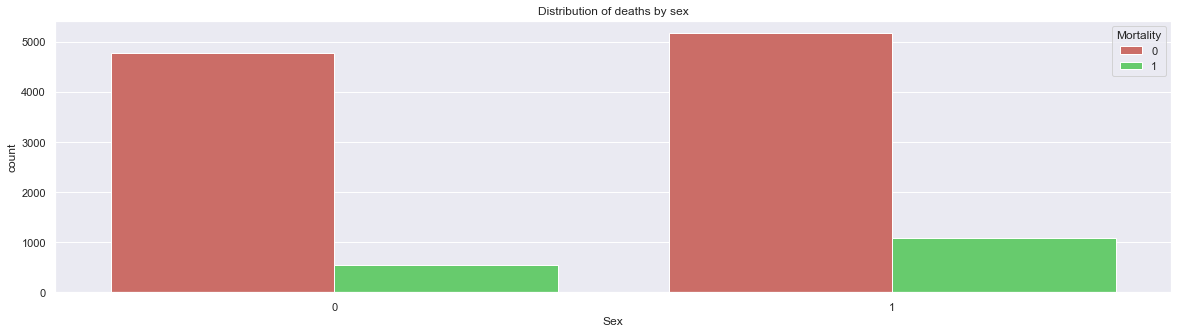

In [38]:
"""CHI2 Sex y Mortality"""
data['Sex'].value_counts()
#data[({'Sex': ['Men', 'Women',]})]
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Sex", hue="Mortality", data=X, )
ax.set(title="Distribution of deaths by sex",)

"""Contingency table"""
SEXO_MORTALIDAD_ct=pd.crosstab(index=data['Sex'],columns=data['Mortality'])
SEXO_MORTALIDAD_ct
SEXO_MORTALIDAD_ct.iloc[0].values
SEXO_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([SEXO_MORTALIDAD_ct.iloc[0].values,SEXO_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Sex'],columns=data['Mortality'], margins=True)

chi2    :  339.76717974445444
p-value :  7.170918072266722e-76
Degree for Freedom :  1


Mortality,Death,Surviving,All
Diabetes,,,
With Diabetes,591,1672,2263
Without Diabetes,1031,8270,9301
All,1622,9942,11564


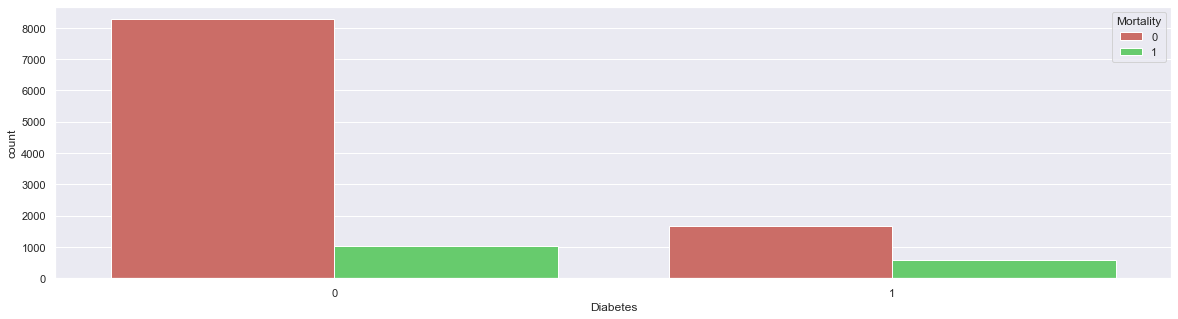

In [39]:
"""CHI2 Diabetes"""
data['Diabetes'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Diabetes", hue="Mortality", data=X)
"""Contingency table"""
DIABETES_MORTALIDAD_ct=pd.crosstab(index=data['Diabetes'],columns=data['Mortality'])
DIABETES_MORTALIDAD_ct
DIABETES_MORTALIDAD_ct.iloc[0].values
DIABETES_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([DIABETES_MORTALIDAD_ct.iloc[0].values,DIABETES_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Diabetes'],columns=data['Mortality'], margins=True)

chi2    :  53.79152229680487
p-value :  2.2293259435218948e-13
Degree for Freedom :  1


Mortality,Death,Surviving,All
COPD,,,
With COPD,71,159,230
Without COPD,1551,9783,11334
All,1622,9942,11564


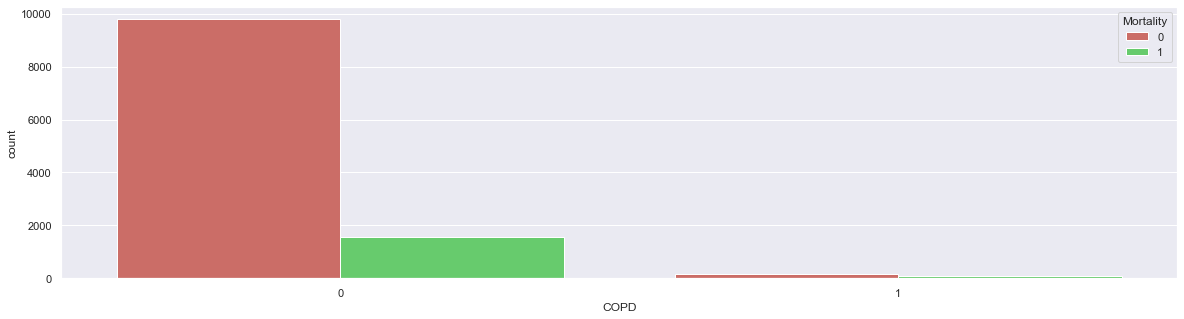

In [40]:
"""CHI2 COPD"""
data['COPD'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="COPD", hue="Mortality", data=X)
"""Contingency table"""
EPOC_MORTALIDAD_ct=pd.crosstab(index=data['COPD'],columns=data['Mortality'])
EPOC_MORTALIDAD_ct
EPOC_MORTALIDAD_ct.iloc[0].values
EPOC_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([EPOC_MORTALIDAD_ct.iloc[0].values,EPOC_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['COPD'],columns=data['Mortality'], margins=True)

chi2    :  4.122386336128033
p-value :  0.04231934394991626
Degree for Freedom :  1


Mortality,Death,Surviving,All
Asthma,,,
With Asthma,20,200,220
Without Asthma,1602,9742,11344
All,1622,9942,11564


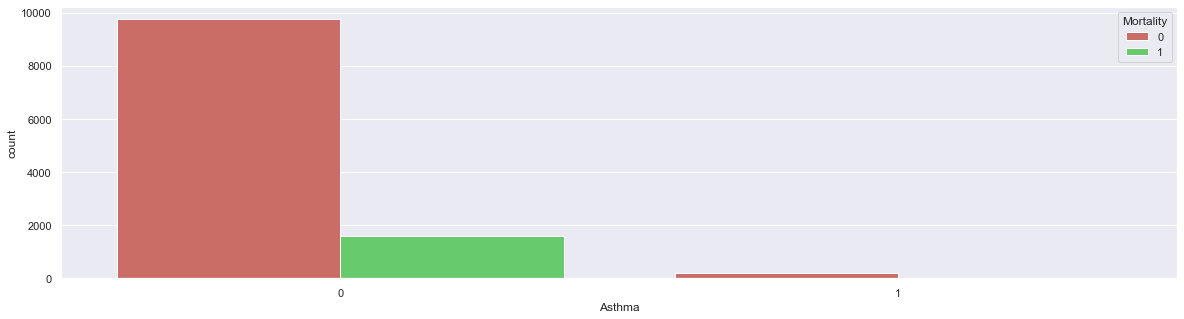

In [41]:
"""CHI2 Asthma"""
data['Asthma'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Asthma", hue="Mortality", data=X)
"""Contingency table"""
ASMA_MORTALIDAD_ct=pd.crosstab(index=data['Asthma'],columns=data['Mortality'])
ASMA_MORTALIDAD_ct
ASMA_MORTALIDAD_ct.iloc[0].values
ASMA_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([ASMA_MORTALIDAD_ct.iloc[0].values,ASMA_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Asthma'],columns=data['Mortality'], margins=True)

chi2    :  5.7184002338629005
p-value :  0.01678801983790428
Degree for Freedom :  1


Mortality,Death,Surviving,All
Immunosuppression,,,
With Immunosuppression,18,56,74
Without Immunosuppression,1604,9886,11490
All,1622,9942,11564


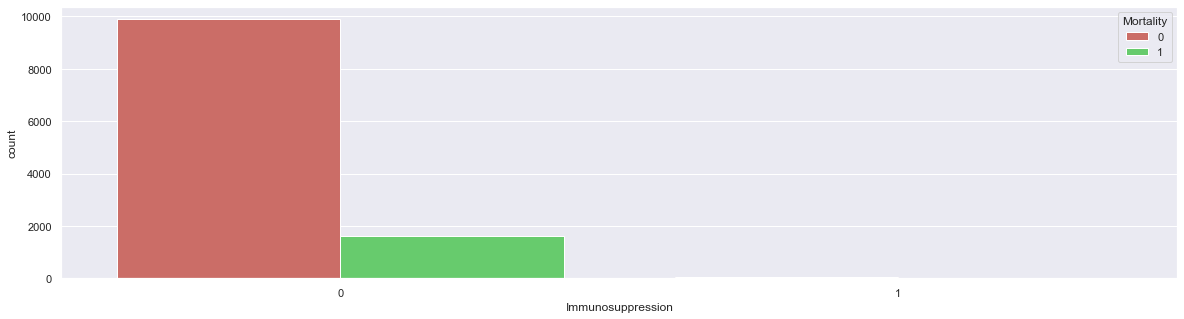

In [42]:
"""CHI2 Immunosuppression"""
data['Immunosuppression'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Immunosuppression", hue="Mortality", data=X)
"""Contingency table"""
INMUSUPR_MORTALIDAD_ct=pd.crosstab(index=data['Immunosuppression'],columns=data['Mortality'])
INMUSUPR_MORTALIDAD_ct
INMUSUPR_MORTALIDAD_ct.iloc[0].values
INMUSUPR_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([INMUSUPR_MORTALIDAD_ct.iloc[0].values,INMUSUPR_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Immunosuppression'],columns=data['Mortality'], margins=True)

chi2    :  433.88709326892666
p-value :  2.31670785784008e-96
Degree for Freedom :  1


Mortality,Death,Surviving,All
Hypertension,,,
With Hypertension,725,2067,2792
Without Hypertension,897,7875,8772
All,1622,9942,11564


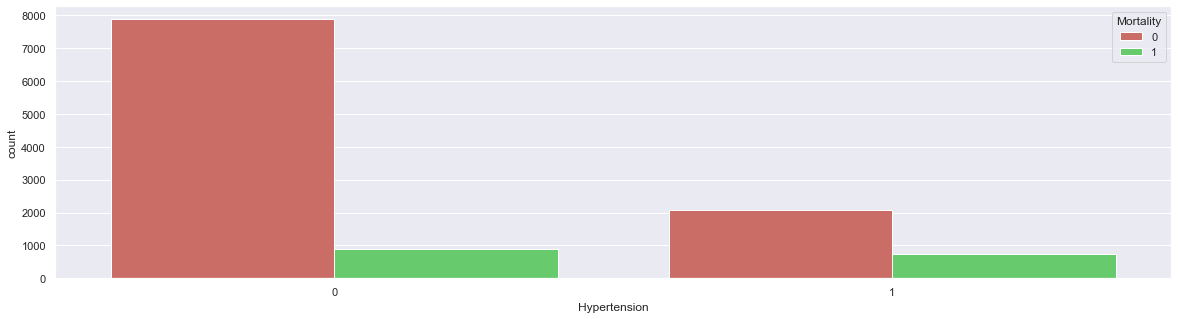

In [43]:
"""CHI2 Hypertension"""
data['Hypertension'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Hypertension", hue="Mortality", data=X)
"""Contingency table"""
HIPERTEN_MORTALIDAD_ct=pd.crosstab(index=data['Hypertension'],columns=data['Mortality'])
HIPERTEN_MORTALIDAD_ct
HIPERTEN_MORTALIDAD_ct.iloc[0].values
HIPERTEN_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([HIPERTEN_MORTALIDAD_ct.iloc[0].values,HIPERTEN_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Hypertension'],columns=data['Mortality'], margins=True)

chi2    :  57.30706064214848
p-value :  3.728144427732312e-14
Degree for Freedom :  1


Mortality,Death,Surviving,All
Cardiovascular disease,,,
With Cardiovascular disease,78,178,256
Without Cardiovascular disease,1544,9764,11308
All,1622,9942,11564


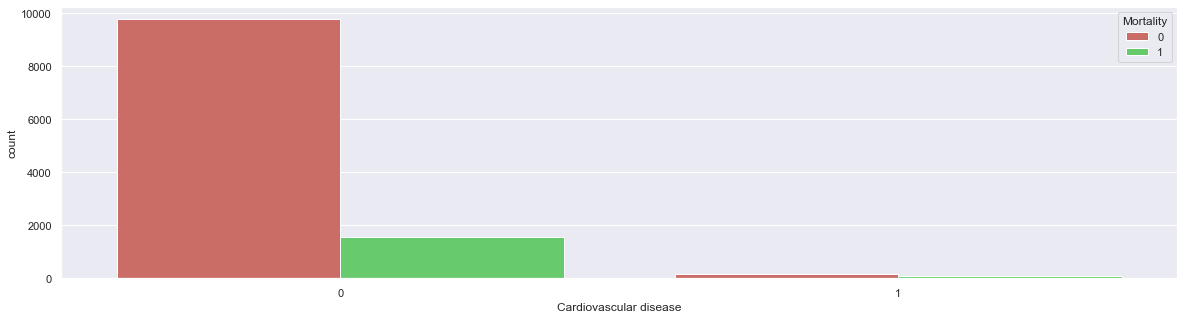

In [44]:
"""CHI2 Cardiovascular disease"""
data['Cardiovascular disease'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Cardiovascular disease", hue="Mortality", data=X)
"""Contingency table"""
ENFCARDI_MORTALIDAD_ct=pd.crosstab(index=data['Cardiovascular disease'],columns=data['Mortality'])
ENFCARDI_MORTALIDAD_ct
ENFCARDI_MORTALIDAD_ct.iloc[0].values
ENFCARDI_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([ENFCARDI_MORTALIDAD_ct.iloc[0].values,ENFCARDI_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Cardiovascular disease'],columns=data['Mortality'], margins=True)

chi2    :  0.4820008759311978
p-value :  0.4875173972197461
Degree for Freedom :  1


Mortality,Death,Surviving,All
Obesity,,,
With Obesity,285,1674,1959
Without Obesity,1337,8268,9605
All,1622,9942,11564


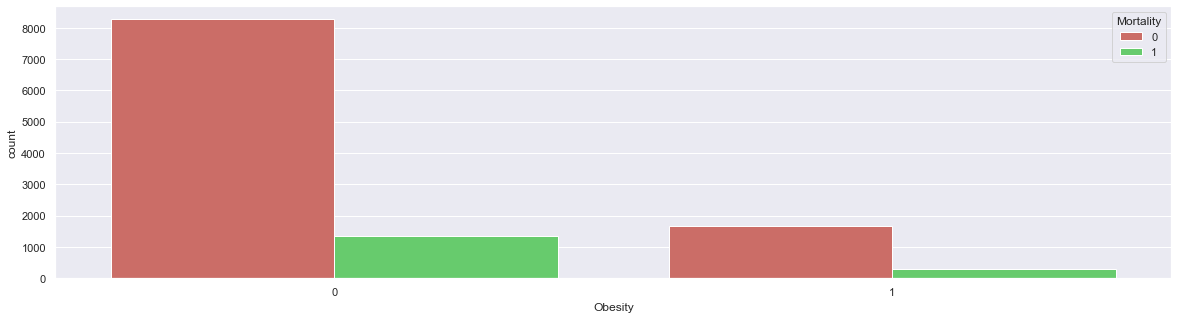

In [45]:
"""CHI2 Obesity"""
data['Obesity'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Obesity", hue="Mortality", data=X)
"""Contingency table"""
OBESIDAD_MORTALIDAD_ct=pd.crosstab(index=data['Obesity'],columns=data['Mortality'])
OBESIDAD_MORTALIDAD_ct
OBESIDAD_MORTALIDAD_ct.iloc[0].values
OBESIDAD_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([OBESIDAD_MORTALIDAD_ct.iloc[0].values,OBESIDAD_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Obesity'],columns=data['Mortality'], margins=True)

chi2    :  253.28451854523607
p-value :  4.993479988317161e-57
Degree for Freedom :  1


Mortality,Death,Surviving,All
CKD,,,
With CKD,150,195,345
Without CKD,1472,9747,11219
All,1622,9942,11564


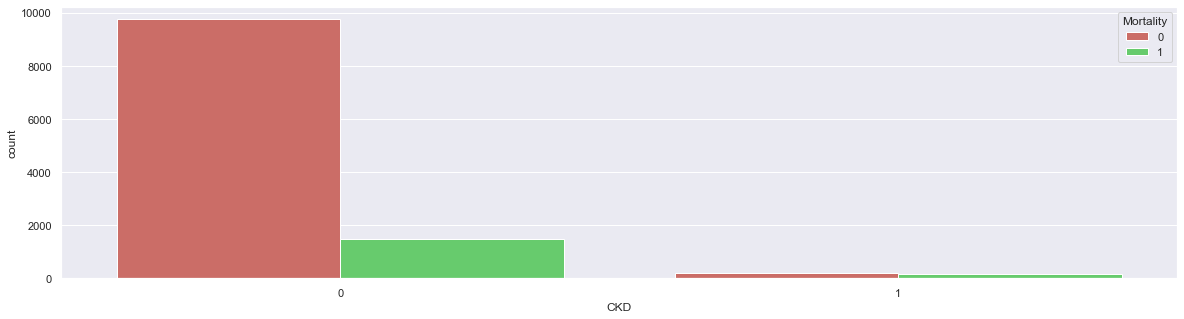

In [46]:
"""CHI2 CKD"""
data['CKD'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="CKD", hue="Mortality", data=X)
"""Contingency table"""
INSRENCR_MORTALIDAD_ct=pd.crosstab(index=data['CKD'],columns=data['Mortality'])
INSRENCR_MORTALIDAD_ct
INSRENCR_MORTALIDAD_ct.iloc[0].values
INSRENCR_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([INSRENCR_MORTALIDAD_ct.iloc[0].values,INSRENCR_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['CKD'],columns=data['Mortality'], margins=True)

chi2    :  8.203105585671482
p-value :  0.004181874883353245
Degree for Freedom :  1


Mortality,Death,Surviving,All
Smoking,,,
With Smoking,130,607,737
Without Smoking,1492,9335,10827
All,1622,9942,11564


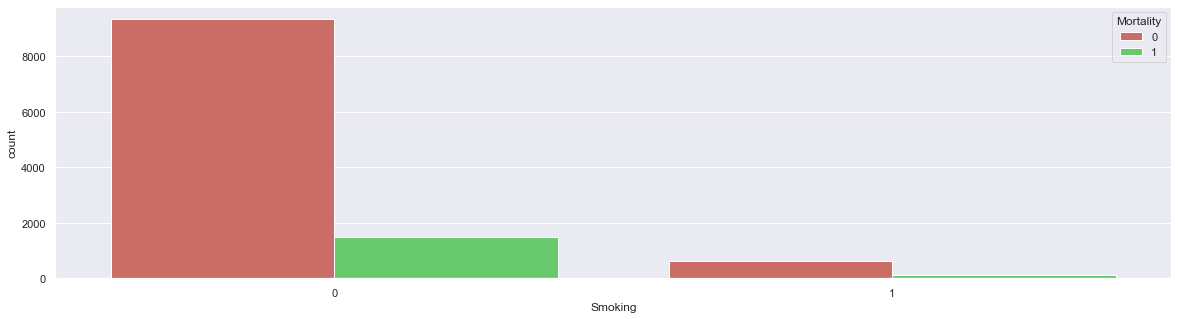

In [47]:
"""CHI2 Smoking"""
data['Smoking'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Smoking", hue="Mortality", data=X)
"""Contingency table"""
TABAQUIS_MORTALIDAD_ct=pd.crosstab(index=data['Smoking'],columns=data['Mortality'])
TABAQUIS_MORTALIDAD_ct
TABAQUIS_MORTALIDAD_ct.iloc[0].values
TABAQUIS_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([TABAQUIS_MORTALIDAD_ct.iloc[0].values,TABAQUIS_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Smoking'],columns=data['Mortality'], margins=True)

chi2    :  32.99817060779589
p-value :  9.224562923257107e-09
Degree for Freedom :  1


Mortality,Death,Surviving,All
Fever,,,
With Fever,1450,8332,9782
Without Fever,172,1610,1782
All,1622,9942,11564


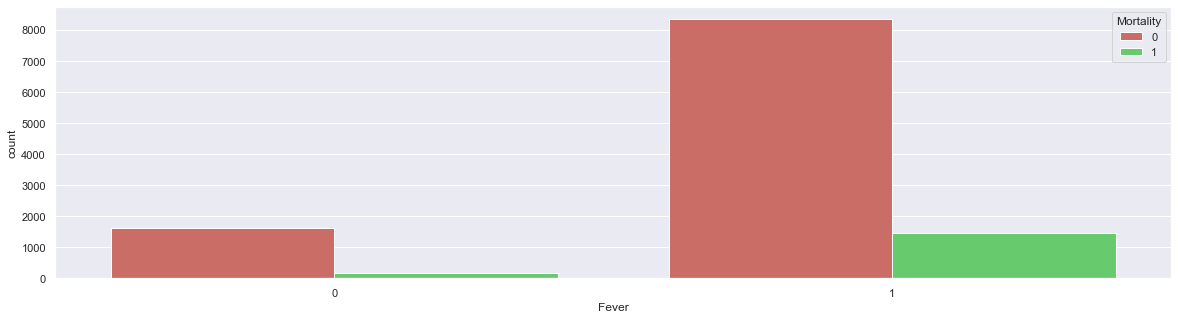

In [48]:
"""CHI2 Fever"""
data['Fever'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Fever", hue="Mortality", data=X)
"""Contingency table"""
FIEBRE_MORTALIDAD_ct=pd.crosstab(index=data['Fever'],columns=data['Mortality'])
FIEBRE_MORTALIDAD_ct
FIEBRE_MORTALIDAD_ct.iloc[0].values
FIEBRE_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([FIEBRE_MORTALIDAD_ct.iloc[0].values,FIEBRE_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Fever'],columns=data['Mortality'], margins=True)

chi2    :  26.85464960730423
p-value :  2.1934599385377373e-07
Degree for Freedom :  1


Mortality,Death,Surviving,All
Cough,,,
With Cough,1472,8550,10022
Without Cough,150,1392,1542
All,1622,9942,11564


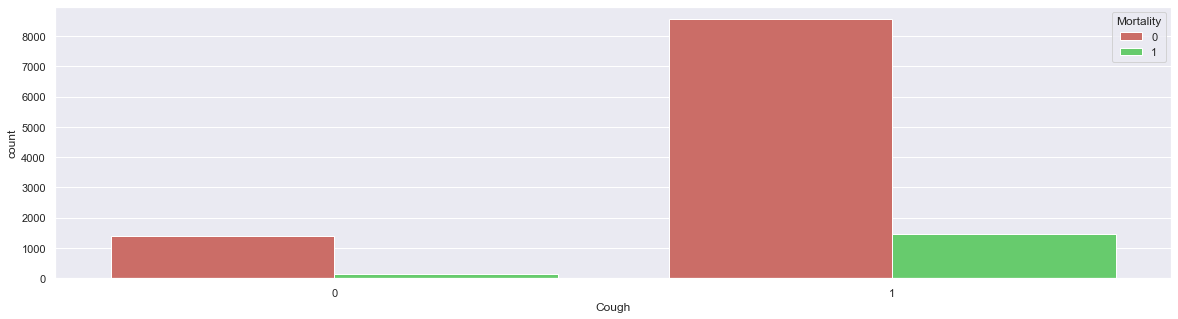

In [49]:
"""CHI2 Cough"""
data['Cough'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Cough", hue="Mortality", data=X)
"""Contingency table"""
TOS_MORTALIDAD_ct=pd.crosstab(index=data['Cough'],columns=data['Mortality'])
TOS_MORTALIDAD_ct
TOS_MORTALIDAD_ct.iloc[0].values
TOS_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([TOS_MORTALIDAD_ct.iloc[0].values,TOS_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Cough'],columns=data['Mortality'], margins=True)

chi2    :  5.4780706737702545
p-value :  0.019256501528780175
Degree for Freedom :  1


Mortality,Death,Surviving,All
Odynophagia,,,
With Odynophagia,946,6106,7052
Without Odynophagia,676,3836,4512
All,1622,9942,11564


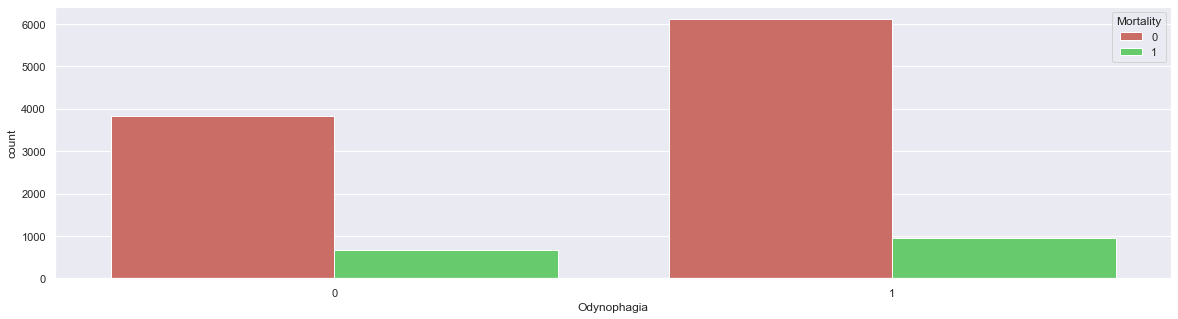

In [50]:
"""CHI2 Odynophagia"""
data['Odynophagia'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Odynophagia", hue="Mortality", data=X)
"""Contingency table"""
ODINOGIA_MORTALIDAD_ct=pd.crosstab(index=data['Odynophagia'],columns=data['Mortality'])
ODINOGIA_MORTALIDAD_ct
ODINOGIA_MORTALIDAD_ct.iloc[0].values
ODINOGIA_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([ODINOGIA_MORTALIDAD_ct.iloc[0].values,ODINOGIA_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Odynophagia'],columns=data['Mortality'], margins=True)

chi2    :  1222.7163610833227
p-value :  7.054048789356939e-268
Degree for Freedom :  1


Mortality,Death,Surviving,All
Dyspnea,,,
With Dyspnea,1370,3768,5138
Without Dyspnea,252,6174,6426
All,1622,9942,11564


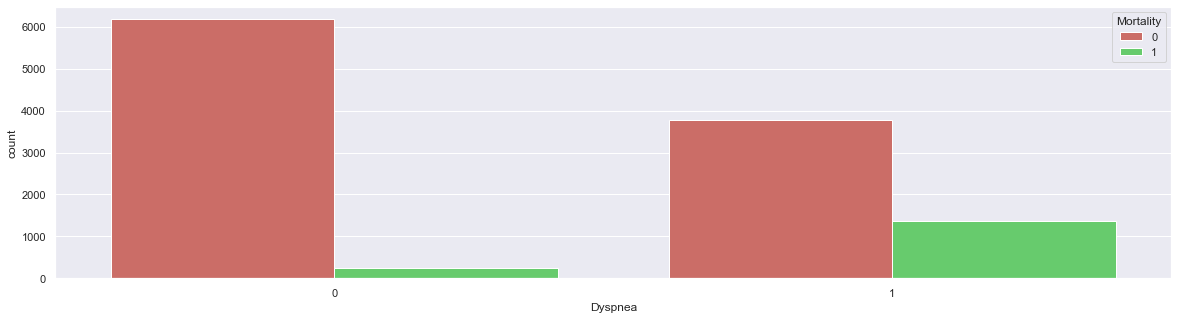

In [51]:
"""CHI2 Dyspnea"""
data['Dyspnea'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Dyspnea", hue="Mortality", data=X)
"""Contingency table"""
DISNEA_MORTALIDAD_ct=pd.crosstab(index=data['Dyspnea'],columns=data['Mortality'])
DISNEA_MORTALIDAD_ct
DISNEA_MORTALIDAD_ct.iloc[0].values
DISNEA_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([DISNEA_MORTALIDAD_ct.iloc[0].values,DISNEA_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Dyspnea'],columns=data['Mortality'], margins=True)

chi2    :  3.53540942846543
p-value :  0.060071501438017615
Degree for Freedom :  1


Mortality,Death,Surviving,All
Irritability,,,
With Irritability,272,1484,1756
Without Irritability,1350,8458,9808
All,1622,9942,11564


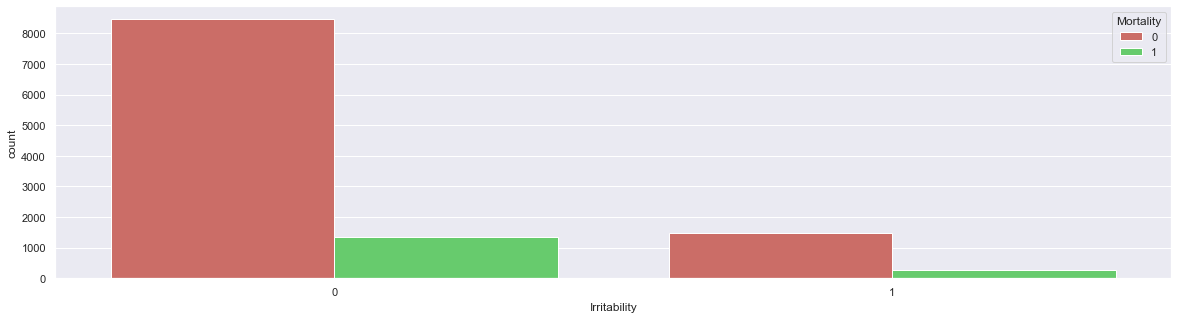

In [52]:
"""CHI2 Irritability"""
data['Irritability'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Irritability", hue="Mortality", data=X)
"""Contingency table"""
IRRITABI_MORTALIDAD_ct=pd.crosstab(index=data['Irritability'],columns=data['Mortality'])
IRRITABI_MORTALIDAD_ct
IRRITABI_MORTALIDAD_ct.iloc[0].values
IRRITABI_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([IRRITABI_MORTALIDAD_ct.iloc[0].values,IRRITABI_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Irritability'],columns=data['Mortality'], margins=True)

chi2    :  14.915606690008536
p-value :  0.00011242902821989934
Degree for Freedom :  1


Mortality,Death,Surviving,All
Diarrhea,,,
With Diarrhea,285,2171,2456
Without Diarrhea,1337,7771,9108
All,1622,9942,11564


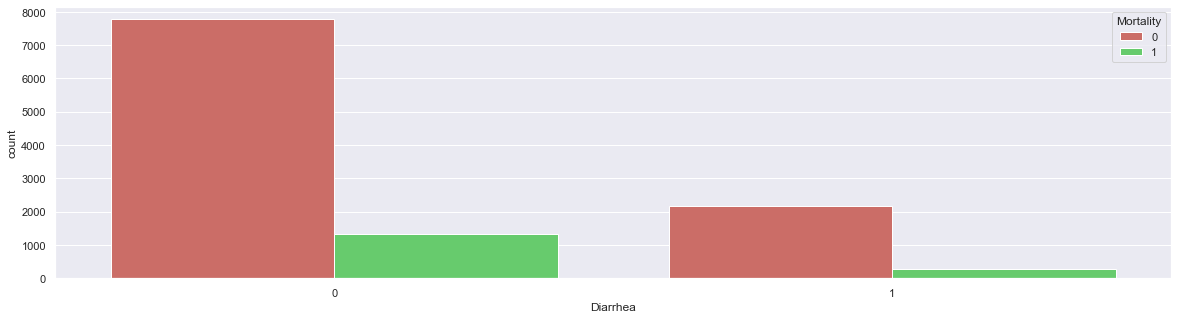

In [53]:
"""CHI2 Diarrhea"""
data['Diarrhea'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Diarrhea", hue="Mortality", data=X)
"""Contingency tablea"""
DIARREA_MORTALIDAD_ct=pd.crosstab(index=data['Diarrhea'],columns=data['Mortality'])
DIARREA_MORTALIDAD_ct
DIARREA_MORTALIDAD_ct.iloc[0].values
DIARREA_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([DIARREA_MORTALIDAD_ct.iloc[0].values,DIARREA_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Diarrhea'],columns=data['Mortality'], margins=True)

chi2    :  35.75388250403289
p-value :  2.238853507526656e-09
Degree for Freedom :  1


Mortality,Death,Surviving,All
Chest pain,,,
With Chest pain,640,3171,3811
Without Chest pain,982,6771,7753
All,1622,9942,11564


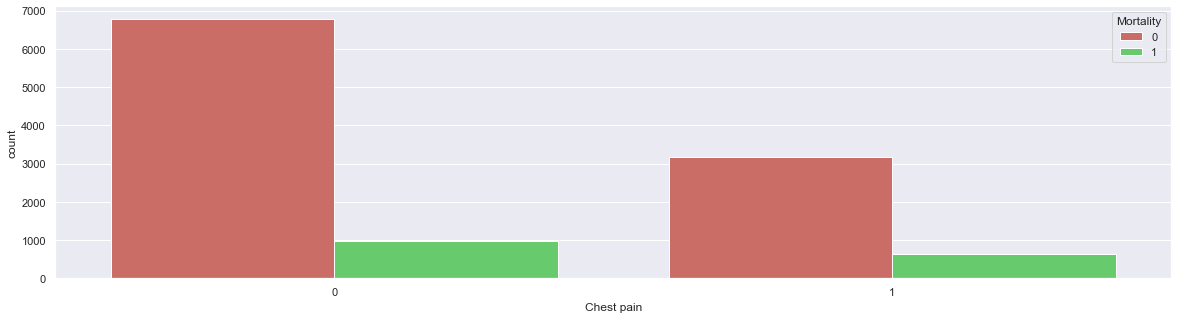

In [54]:
data['Chest pain'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Chest pain", hue="Mortality", data=X)
"""Contingency table"""
DOTORACI_MORTALIDAD_ct=pd.crosstab(index=data['Chest pain'],columns=data['Mortality'])
DOTORACI_MORTALIDAD_ct
DOTORACI_MORTALIDAD_ct.iloc[0].values
DOTORACI_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([DOTORACI_MORTALIDAD_ct.iloc[0].values,DOTORACI_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Chest pain'],columns=data['Mortality'], margins=True)

chi2    :  1.0299662270122567
p-value :  0.31016660010510466
Degree for Freedom :  1


Mortality,Death,Surviving,All
Chills,,,
With Chills,869,5188,6057
Without Chills,753,4754,5507
All,1622,9942,11564


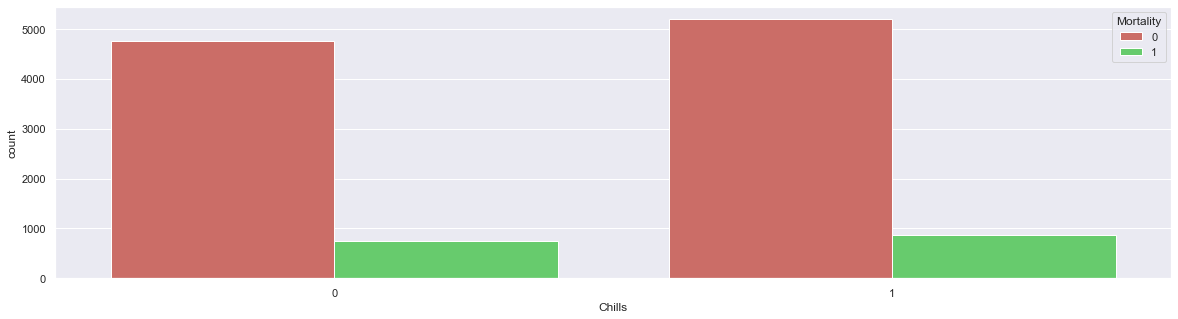

In [55]:
"""CHI2 Chills"""
data['Chills'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Chills", hue="Mortality", data=X)
"""Contingency table"""
CALOFRIOS_MORTALIDAD_ct=pd.crosstab(index=data['Chills'],columns=data['Mortality'])
CALOFRIOS_MORTALIDAD_ct
CALOFRIOS_MORTALIDAD_ct.iloc[0].values
CALOFRIOS_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([CALOFRIOS_MORTALIDAD_ct.iloc[0].values,CALOFRIOS_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Chills'],columns=data['Mortality'], margins=True)

chi2    :  23.571315570961367
p-value :  1.203685650391286e-06
Degree for Freedom :  1


Mortality,Death,Surviving,All
Headache,,,
With Headache,1312,8508,9820
Without Headache,310,1434,1744
All,1622,9942,11564


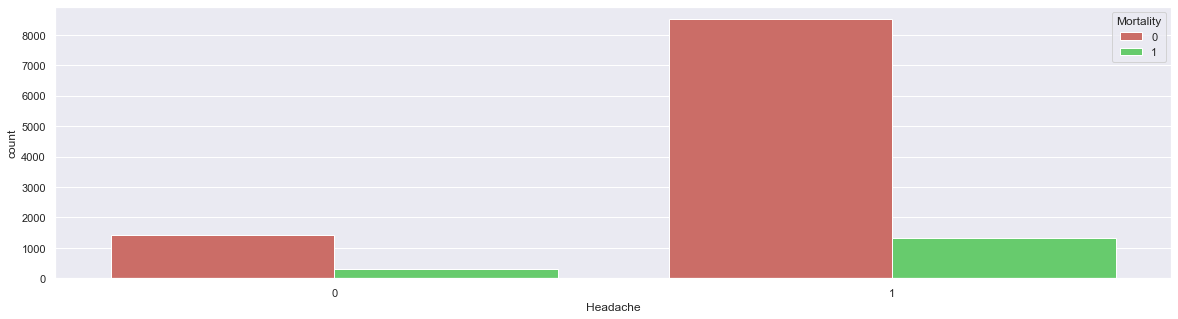

In [56]:
"""CHI2 Headache"""
data['Headache'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Headache", hue="Mortality", data=X)
"""Contingency table"""
CEFALEA_MORTALIDAD_ct=pd.crosstab(index=data['Headache'],columns=data['Mortality'])
CEFALEA_MORTALIDAD_ct
CEFALEA_MORTALIDAD_ct.iloc[0].values
CEFALEA_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([CEFALEA_MORTALIDAD_ct.iloc[0].values,CEFALEA_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Headache'],columns=data['Mortality'], margins=True)

chi2    :  7.170617618074448
p-value :  0.007410725686429638
Degree for Freedom :  1


Mortality,Death,Surviving,All
Myalgia,,,
With Myalgia,1258,7398,8656
Without Myalgia,364,2544,2908
All,1622,9942,11564


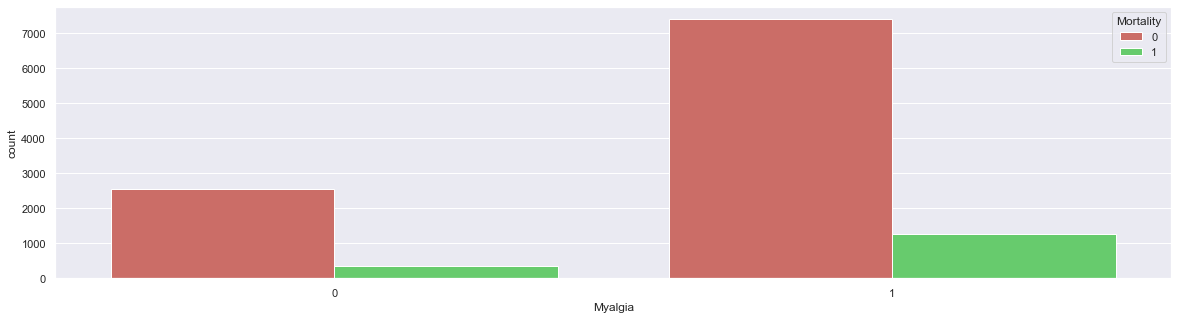

In [57]:
"""CHI2 Myalgia"""
data['Myalgia'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Myalgia", hue="Mortality", data=X)
"""Contingency table"""
MIALGIAS_MORTALIDAD_ct=pd.crosstab(index=data['Myalgia'],columns=data['Mortality'])
MIALGIAS_MORTALIDAD_ct
MIALGIAS_MORTALIDAD_ct.iloc[0].values
MIALGIAS_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([MIALGIAS_MORTALIDAD_ct.iloc[0].values,MIALGIAS_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Myalgia'],columns=data['Mortality'], margins=True)

chi2    :  15.290842318833782
p-value :  9.216222580979536e-05
Degree for Freedom :  1


Mortality,Death,Surviving,All
Arthralgia,,,
With Arthralgia,1212,6951,8163
Without Arthralgia,410,2991,3401
All,1622,9942,11564


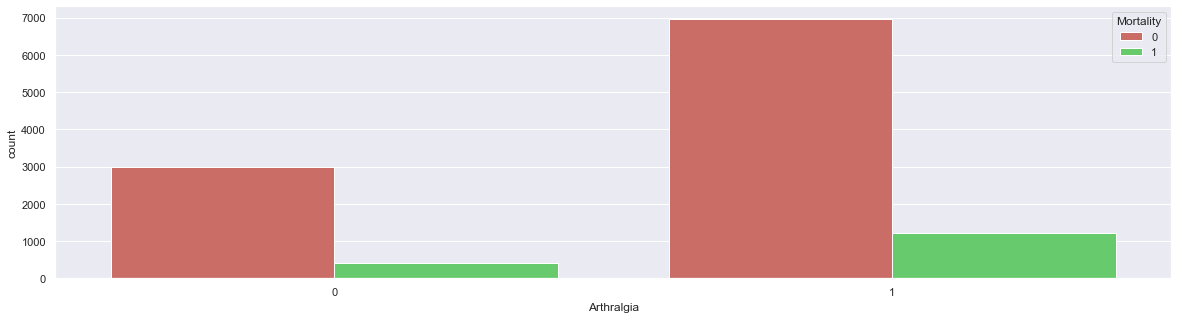

In [58]:
"""CHI2 Arthralgia"""
data['Arthralgia'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Arthralgia", hue="Mortality", data=X)
"""Contingency table"""
ARTRAL_MORTALIDAD_ct=pd.crosstab(index=data['Arthralgia'],columns=data['Mortality'])
ARTRAL_MORTALIDAD_ct
ARTRAL_MORTALIDAD_ct.iloc[0].values
ARTRAL_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([ARTRAL_MORTALIDAD_ct.iloc[0].values,ARTRAL_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Arthralgia'],columns=data['Mortality'], margins=True)

chi2    :  72.09920747048575
p-value :  2.0464592632226202e-17
Degree for Freedom :  1


Mortality,Death,Surviving,All
General discomfort,,,
With General discomfort,1081,5503,6584
Without General discomfort,541,4439,4980
All,1622,9942,11564


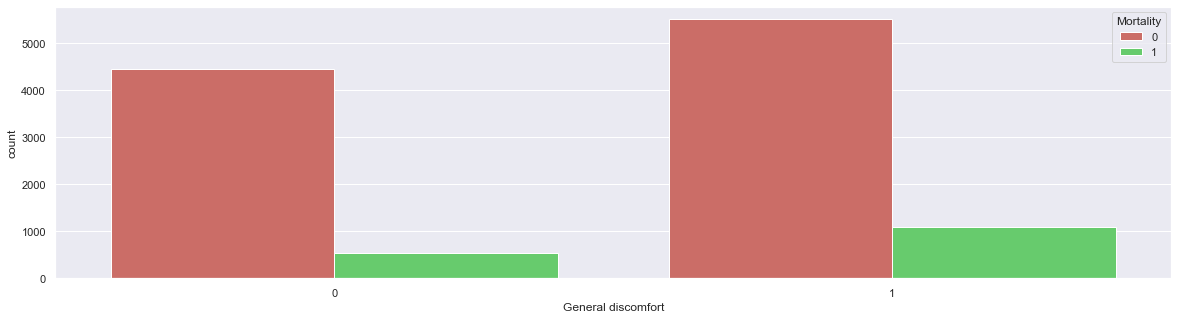

In [59]:
"""CHI2 General discomfort"""
data['General discomfort'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="General discomfort", hue="Mortality", data=X)
"""Contingency table"""
ATAEDOGE_MORTALIDAD_ct=pd.crosstab(index=data['General discomfort'],columns=data['Mortality'])
ATAEDOGE_MORTALIDAD_ct
ATAEDOGE_MORTALIDAD_ct.iloc[0].values
ATAEDOGE_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([ATAEDOGE_MORTALIDAD_ct.iloc[0].values,ATAEDOGE_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['General discomfort'],columns=data['Mortality'], margins=True)

chi2    :  96.49360604937105
p-value :  8.953251022383723e-23
Degree for Freedom :  1


Mortality,Death,Surviving,All
Rhinorrhea,,,
With Rhinorrhea,329,3227,3556
Without Rhinorrhea,1293,6715,8008
All,1622,9942,11564


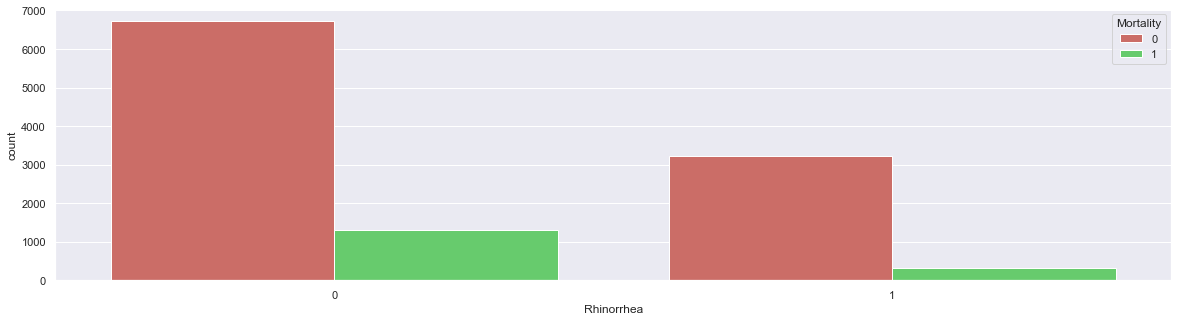

In [60]:
"""CHI2 Rhinorrhea"""
data['Rhinorrhea'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Rhinorrhea", hue="Mortality", data=X)
"""Contingency table"""
RINORREA_MORTALIDAD_ct=pd.crosstab(index=data['Rhinorrhea'],columns=data['Mortality'])
RINORREA_MORTALIDAD_ct
RINORREA_MORTALIDAD_ct.iloc[0].values
RINORREA_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([RINORREA_MORTALIDAD_ct.iloc[0].values,RINORREA_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Rhinorrhea'],columns=data['Mortality'], margins=True)

chi2    :  332.3468669707212
p-value :  2.9623884213211818e-74
Degree for Freedom :  1


Mortality,Death,Surviving,All
Polypnea,,,
With Polypnea,483,1232,1715
Without Polypnea,1139,8710,9849
All,1622,9942,11564


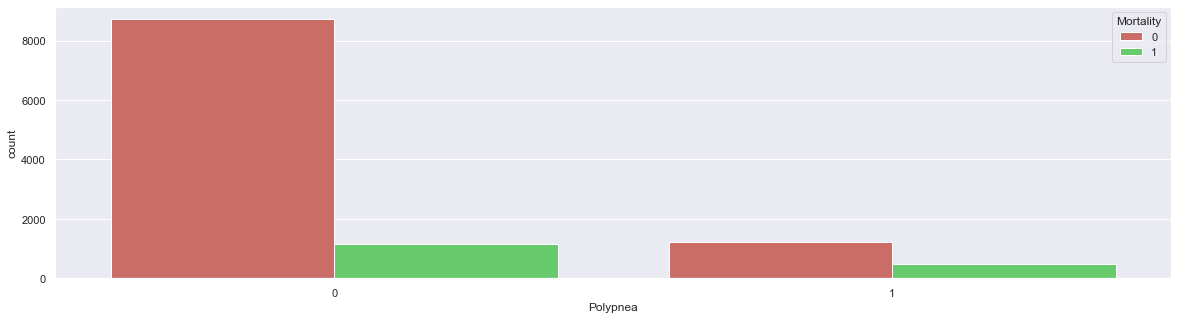

In [61]:
"""CHI2 Polypnea"""
data['Polypnea'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Polypnea", hue="Mortality", data=X)
"""Contingency table"""
POLIPNEA_MORTALIDAD_ct=pd.crosstab(index=data['Polypnea'],columns=data['Mortality'])
POLIPNEA_MORTALIDAD_ct
POLIPNEA_MORTALIDAD_ct.iloc[0].values
POLIPNEA_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([POLIPNEA_MORTALIDAD_ct.iloc[0].values,POLIPNEA_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Polypnea'],columns=data['Mortality'], margins=True)

chi2    :  1.3794953898741367
p-value :  0.24018711948377341
Degree for Freedom :  1


Mortality,Death,Surviving,All
Vomiting,,,
With Vomiting,136,747,883
Without Vomiting,1486,9195,10681
All,1622,9942,11564


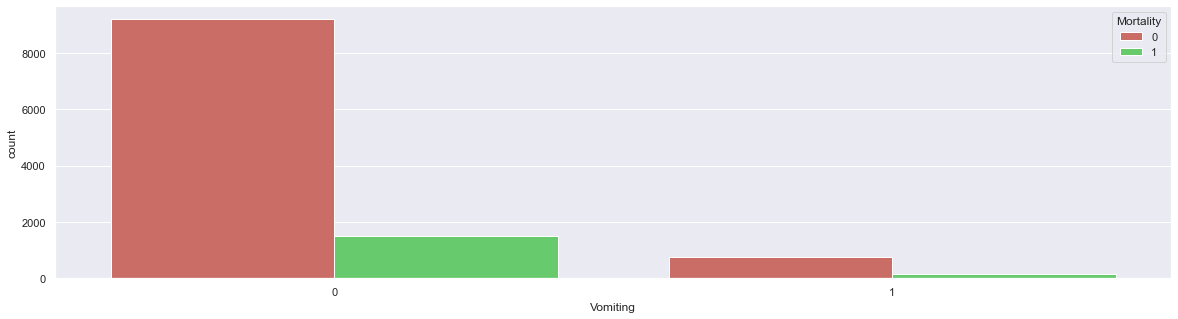

In [62]:
"""CHI2 Vomiting"""
data['Vomiting'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Vomiting", hue="Mortality", data=X)
"""Contingency table"""
VOMITO_MORTALIDAD_ct=pd.crosstab(index=data['Vomiting'],columns=data['Mortality'])
VOMITO_MORTALIDAD_ct
VOMITO_MORTALIDAD_ct.iloc[0].values
VOMITO_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([VOMITO_MORTALIDAD_ct.iloc[0].values,VOMITO_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Vomiting'],columns=data['Mortality'], margins=True)

chi2    :  0.35541056332466103
p-value :  0.5510662057515107
Degree for Freedom :  1


Mortality,Death,Surviving,All
Abdominal pain,,,
With Abdominal pain,202,1295,1497
Without Abdominal pain,1420,8647,10067
All,1622,9942,11564


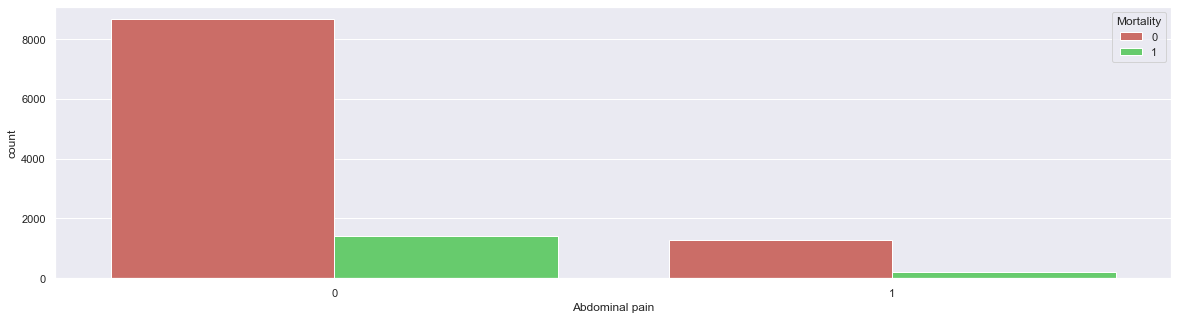

In [63]:
"""CHI2 Abdominal pain"""
data['Abdominal pain'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Abdominal pain", hue="Mortality", data=X)
"""Contingency table"""
DOLABDO_MORTALIDAD_ct=pd.crosstab(index=data['Abdominal pain'],columns=data['Mortality'])
DOLABDO_MORTALIDAD_ct
DOLABDO_MORTALIDAD_ct.iloc[0].values
DOLABDO_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([DOLABDO_MORTALIDAD_ct.iloc[0].values,DOLABDO_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Abdominal pain'],columns=data['Mortality'], margins=True)

chi2    :  51.59452833870743
p-value :  6.823147880697261e-13
Degree for Freedom :  1


Mortality,Death,Surviving,All
Conjunctivitis,,,
With Conjunctivitis,88,1130,1218
Without Conjunctivitis,1534,8812,10346
All,1622,9942,11564


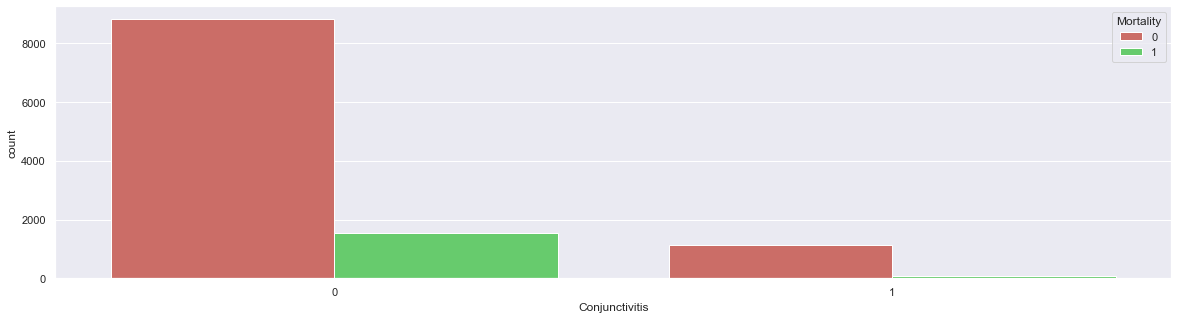

In [64]:
"""CHI2 Conjunctivitis"""
data['Conjunctivitis'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Conjunctivitis", hue="Mortality", data=X)
"""Contingency table"""
CONJUN_MORTALIDAD_ct=pd.crosstab(index=data['Conjunctivitis'],columns=data['Mortality'])
CONJUN_MORTALIDAD_ct
CONJUN_MORTALIDAD_ct.iloc[0].values
CONJUN_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([CONJUN_MORTALIDAD_ct.iloc[0].values,CONJUN_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Conjunctivitis'],columns=data['Mortality'], margins=True)

chi2    :  65.8865130403676
p-value :  4.776490247896641e-16
Degree for Freedom :  1


Mortality,Death,Surviving,All
Cyanosis,,,
With Cyanosis,107,269,376
Without Cyanosis,1515,9673,11188
All,1622,9942,11564


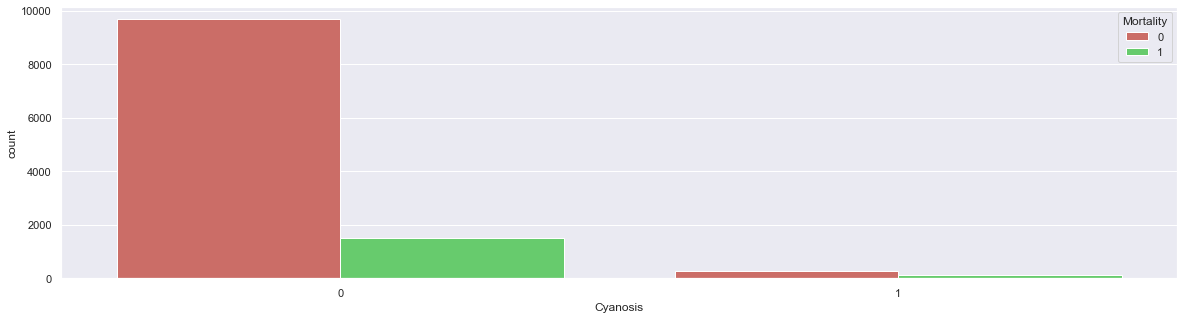

In [65]:
"""CHI2 Cyanosis"""
data['Cyanosis'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Cyanosis", hue="Mortality", data=X)
"""Contingency table"""
CIANOSIS_MORTALIDAD_ct=pd.crosstab(index=data['Cyanosis'],columns=data['Mortality'])
CIANOSIS_MORTALIDAD_ct
CIANOSIS_MORTALIDAD_ct.iloc[0].values
CIANOSIS_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([CIANOSIS_MORTALIDAD_ct.iloc[0].values,CIANOSIS_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Cyanosis'],columns=data['Mortality'], margins=True)

chi2    :  5.481518005867561
p-value :  0.019218562263521012
Degree for Freedom :  1


Mortality,Death,Surviving,All
Sudden onset of symptoms,,,
With Sudden onset of symptoms,518,3475,3993
Without Sudden onset of symptoms,1104,6467,7571
All,1622,9942,11564


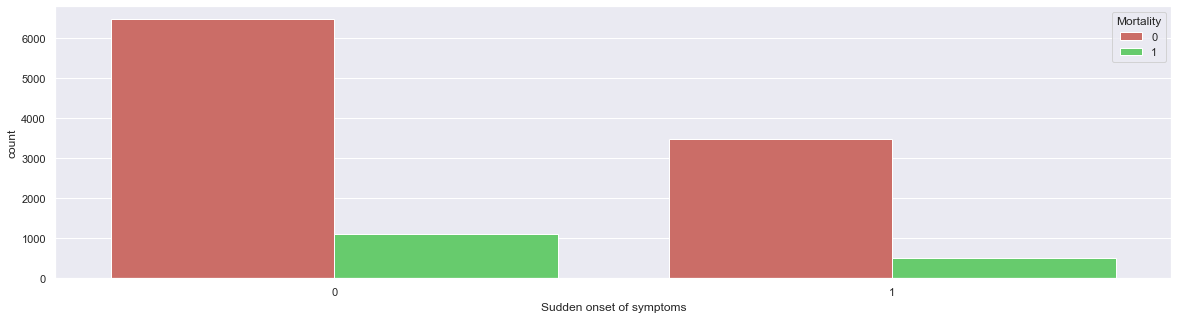

In [66]:
"""CHI2 Sudden onset of symptoms"""
data['Sudden onset of symptoms'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Sudden onset of symptoms", hue="Mortality", data=X)
"""Contingency table"""
INISUBIS_MORTALIDAD_ct=pd.crosstab(index=data['Sudden onset of symptoms'],columns=data['Mortality'])
INISUBIS_MORTALIDAD_ct
INISUBIS_MORTALIDAD_ct.iloc[0].values
INISUBIS_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([INISUBIS_MORTALIDAD_ct.iloc[0].values,INISUBIS_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Sudden onset of symptoms'],columns=data['Mortality'], margins=True)

chi2    :  77.99904193965165
p-value :  1.0309054352199374e-18
Degree for Freedom :  1


Mortality,Death,Surviving,All
Anosmia,,,
With Anosmia,147,1781,1928
Without Anosmia,1475,8161,9636
All,1622,9942,11564


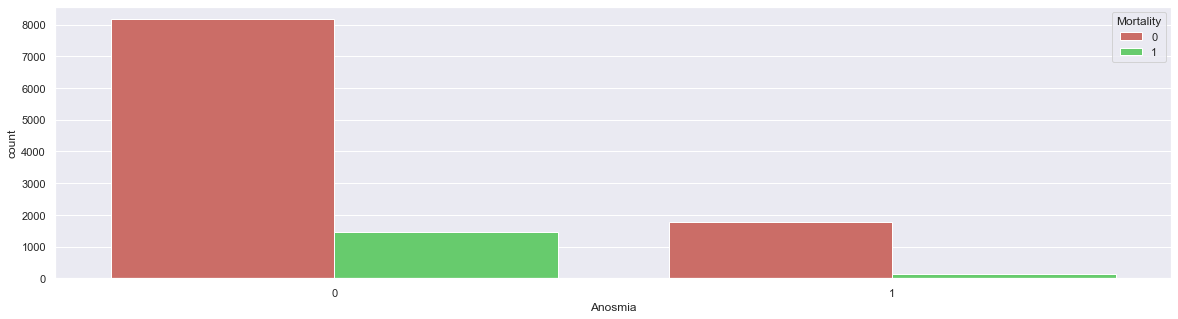

In [67]:
"""CHI2 Anosmia"""
data['Anosmia'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Anosmia", hue="Mortality", data=X)
"""Contingency table"""
ANOSMIA_MORTALIDAD_ct=pd.crosstab(index=data['Anosmia'],columns=data['Mortality'])
ANOSMIA_MORTALIDAD_ct
ANOSMIA_MORTALIDAD_ct.iloc[0].values
ANOSMIA_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([ANOSMIA_MORTALIDAD_ct.iloc[0].values,ANOSMIA_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Anosmia'],columns=data['Mortality'], margins=True)

chi2    :  57.75730823111402
p-value :  2.965362648294602e-14
Degree for Freedom :  1


Mortality,Death,Surviving,All
Dysgeusia,,,
With Dysgeusia,140,1582,1722
Without Dysgeusia,1482,8360,9842
All,1622,9942,11564


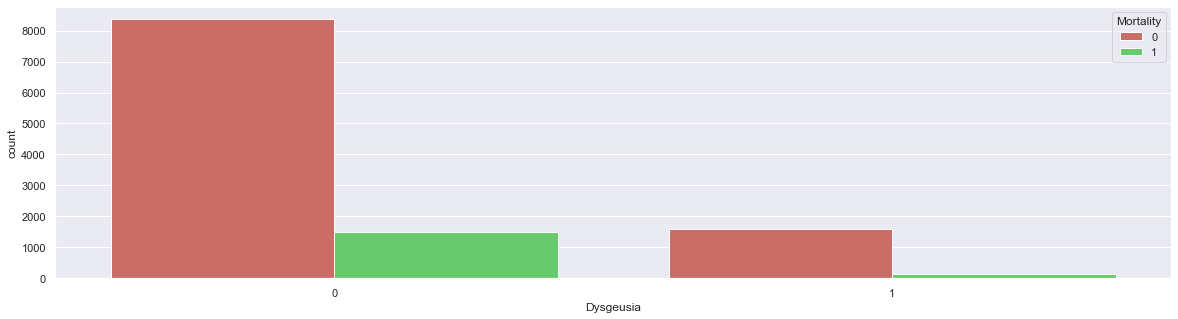

In [68]:
"""CHI2 Dysgeusia"""
data['Dysgeusia'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Dysgeusia", hue="Mortality", data=X)
"""Contingency table"""
DISGEUSIA_MORTALIDAD_ct=pd.crosstab(index=data['Dysgeusia'],columns=data['Mortality'])
DISGEUSIA_MORTALIDAD_ct
DISGEUSIA_MORTALIDAD_ct.iloc[0].values
DISGEUSIA_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([DISGEUSIA_MORTALIDAD_ct.iloc[0].values,DISGEUSIA_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Dysgeusia'],columns=data['Mortality'], margins=True)

chi2    :  5.917378694481337
p-value :  0.014992247420134558
Degree for Freedom :  1


Mortality,Death,Surviving,All
Use of antipyretics,,,
With Use of antipyretics,896,5165,6061
Without Use of antipyretics,726,4777,5503
All,1622,9942,11564


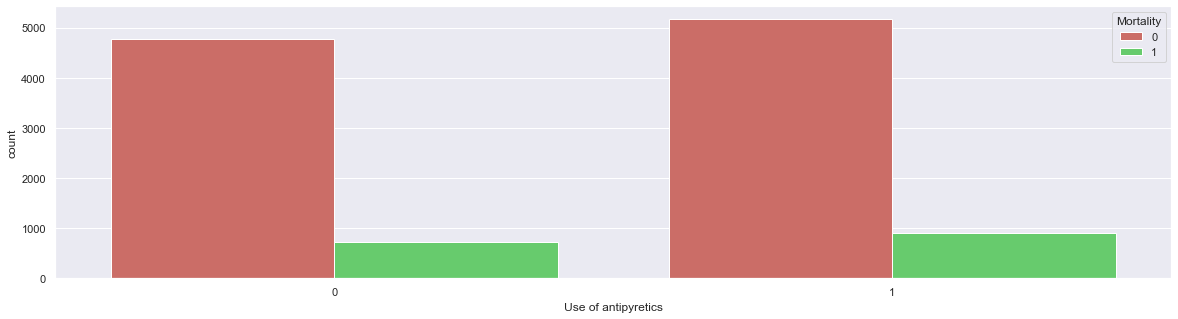

In [69]:
"""CHI2 Use of antipyretics"""
data['Use of antipyretics'].value_counts()
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Use of antipyretics", hue="Mortality", data=X)
"""Contingency table"""
ANTIPIRETICOS_MORTALIDAD_ct=pd.crosstab(index=data['Use of antipyretics'],columns=data['Mortality'])
ANTIPIRETICOS_MORTALIDAD_ct
ANTIPIRETICOS_MORTALIDAD_ct.iloc[0].values
ANTIPIRETICOS_MORTALIDAD_ct.iloc[1].values

"""Sky pay"""
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([ANTIPIRETICOS_MORTALIDAD_ct.iloc[0].values,ANTIPIRETICOS_MORTALIDAD_ct.iloc[1].values])
print ("chi2    : ", chi2)
print ("p-value : ",p)
print ("Degree for Freedom : " ,dof)
pd.crosstab(index=data['Use of antipyretics'],columns=data['Mortality'], margins=True)